<h1>Импорт библиотек

In [50]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [51]:
import numpy as np

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    # Инициализируем результат как нулевой вектор размером (n, 1) с типом float64
    result = np.zeros_like(V[0], dtype=float)
    
    # Перебираем пары (матрица, вектор) и выполняем умножение, добавляя результат
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector).astype(float)
    
    return result


# Тесты
def test_sum_prod():
    # Тест 1: проверка с конкретными числами
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [1]]), np.array([[2], [2]])]
    expected_result = np.array([[25], [37]], dtype=float)  # исправленный ожидаемый результат с типом float
    assert np.array_equal(sum_prod(X, V), expected_result), "Тест 1 не пройден!"

    # Тест 2: проверка с нулями
    X = [np.zeros((2, 2)), np.zeros((2, 2))]
    V = [np.zeros((2, 1)), np.zeros((2, 1))]
    expected_result = np.zeros((2, 1), dtype=float)  # ожидаемый результат
    assert np.array_equal(sum_prod(X, V), expected_result), "Тест 2 не пройден!"

    # Тест 3: проверка с единичными матрицами
    X = [np.eye(2), np.eye(2)]
    V = [np.array([[1], [1]]), np.array([[1], [1]])]
    expected_result = np.array([[2], [2]], dtype=float)  # ожидаемый результат с типом float
    assert np.array_equal(sum_prod(X, V), expected_result), "Тест 3 не пройден!"

    print("Все тесты пройдены!")

# Запуск тестов
test_sum_prod()


Все тесты пройдены!


Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [52]:
def binarize(M, threshold=0.5):
     # Применяем условие: если элемент больше или равен threshold, ставим 1, иначе 0
    binary_matrix = (M >= threshold).astype(int)
    return binary_matrix

# Тесты
def test_binarize():
    # Тест 1: обычный случай с threshold 0.5
    M = np.array([[0.3, 0.6], [0.7, 0.2]])
    threshold = 0.5
    expected_result = np.array([[0, 1], [1, 0]])  # ожидаемый результат
    assert np.array_equal(binarize(M, threshold), expected_result), "Тест 1 не пройден!"
    
    # Тест 2: случай, когда threshold больше всех элементов
    M = np.array([[0.1, 0.2], [0.3, 0.4]])
    threshold = 0.9
    expected_result = np.array([[0, 0], [0, 0]])  # все элементы меньше threshold
    assert np.array_equal(binarize(M, threshold), expected_result), "Тест 2 не пройден!"
    
    # Тест 3: случай, когда threshold меньше всех элементов
    M = np.array([[1.0, 1.5], [2.0, 3.0]])
    threshold = 0.5
    expected_result = np.array([[1, 1], [1, 1]])  # все элементы больше threshold
    assert np.array_equal(binarize(M, threshold), expected_result), "Тест 3 не пройден!"
    
    # Тест 4: проверка с отрицательными значениями
    M = np.array([[-0.3, 0.6], [0.7, -0.2]])
    threshold = 0
    expected_result = np.array([[0, 1], [1, 0]])  # пороговое значение 0
    assert np.array_equal(binarize(M, threshold), expected_result), "Тест 4 не пройден!"
    
    print("Все тесты пройдены!")

# Запуск тестов
test_binarize()


Все тесты пройдены!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [53]:
import numpy as np

def unique_rows(mat):
    """
    Возвращает список уникальных элементов для каждой строки матрицы.
    
    :param mat: Входная матрица (numpy array)
    :return: Список уникальных элементов для каждой строки
    """
    # Если матрица пустая
    if mat.size == 0:
        return []
    
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    """
    Возвращает список уникальных элементов для каждого столбца матрицы.
    
    :param mat: Входная матрица (numpy array)
    :return: Список уникальных элементов для каждого столбца
    """
    # Если матрица пустая
    if mat.size == 0:
        return []
    
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]


# Тесты
def test_unique_rows_columns():
    # Тест 1: Проверка уникальных элементов по строкам
    mat = np.array([[1, 2, 2], [3, 3, 3], [4, 5, 4]])
    expected_rows = [np.array([1, 2]), np.array([3]), np.array([4, 5])]
    assert all(np.array_equal(unique_rows(mat)[i], expected_rows[i]) for i in range(len(expected_rows))), "Тест 1 (строки) не пройден!"
    
    # Тест 2: Проверка уникальных элементов по столбцам
    expected_columns = [np.array([1, 3, 4]), np.array([2, 3, 5]), np.array([2, 3, 4])]
    assert all(np.array_equal(unique_columns(mat)[i], expected_columns[i]) for i in range(len(expected_columns))), "Тест 2 (столбцы) не пройден!"
    
    # Тест 3: Проверка на матрице с одинаковыми элементами
    mat = np.array([[1, 1], [1, 1]])
    expected_rows = [np.array([1]), np.array([1])]
    expected_columns = [np.array([1]), np.array([1])]
    assert all(np.array_equal(unique_rows(mat)[i], expected_rows[i]) for i in range(len(expected_rows))), "Тест 3 (строки) не пройден!"
    assert all(np.array_equal(unique_columns(mat)[i], expected_columns[i]) for i in range(len(expected_columns))), "Тест 3 (столбцы) не пройден!"
    
    # Тест 4: Проверка на пустой матрице
    mat = np.array([[]])
    expected_rows = []
    expected_columns = []
    assert unique_rows(mat) == expected_rows, "Тест 4 (строки) не пройден!"
    assert unique_columns(mat) == expected_columns, "Тест 4 (столбцы) не пройден!"
    
    print("Все тесты пройдены!")

# Запуск тестов
test_unique_rows_columns()


Все тесты пройдены!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Мат. ожидание для строк: [-0.17611679  0.67199886  0.04141511  0.05051914  0.08707389]
Дисперсия для строк: [0.74572021 0.73625316 0.88314517 0.87409807 0.6308549 ]
Мат. ожидание для столбцов: [ 0.16348541  0.10937145 -0.0696069   0.33666221]
Дисперсия для столбцов: [0.82002874 1.04075124 0.26973349 1.20422666]


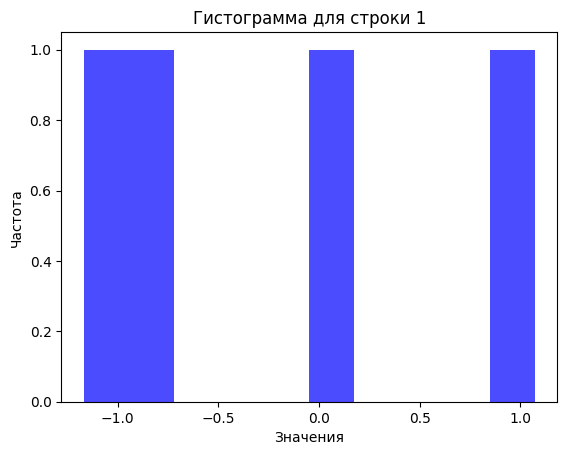

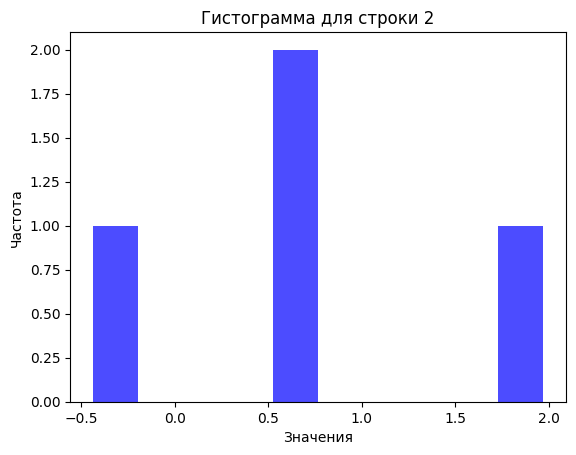

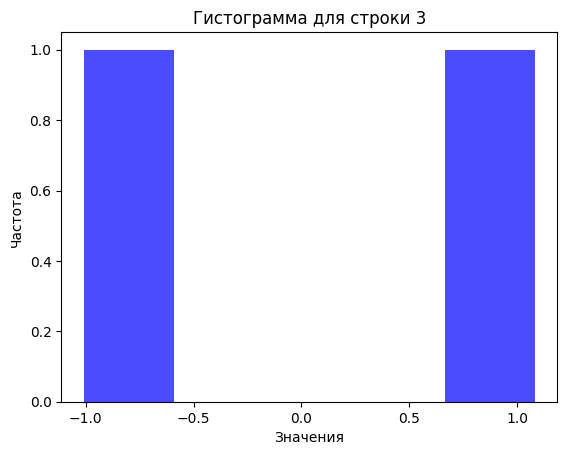

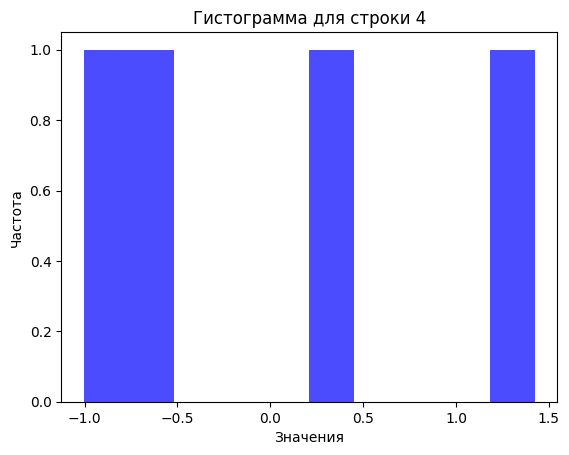

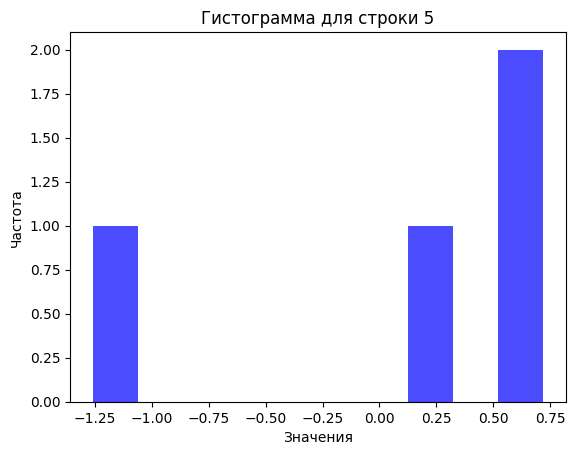

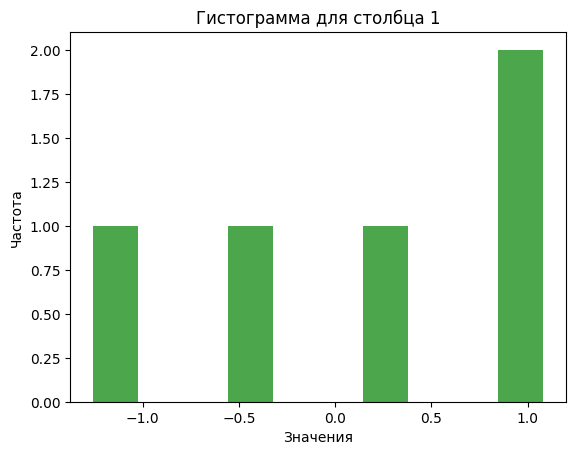

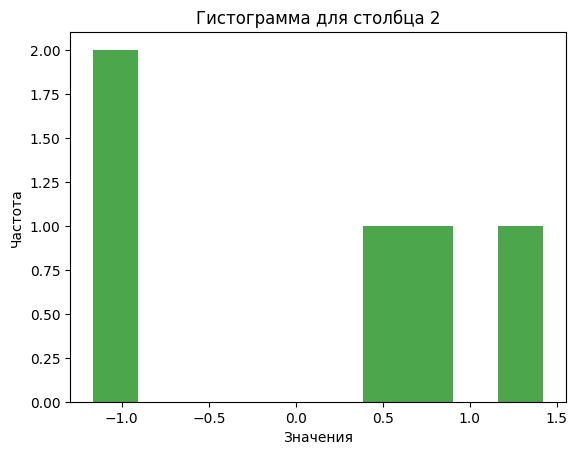

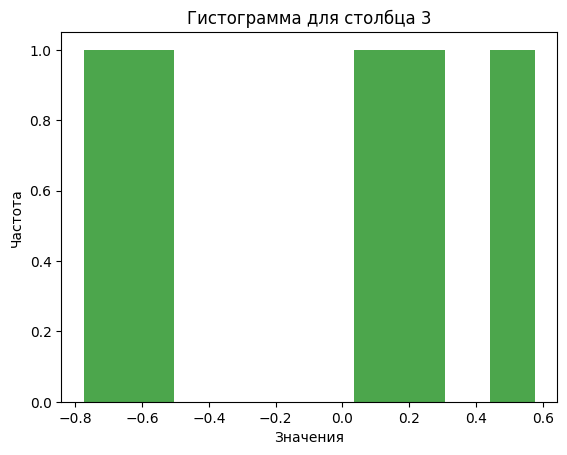

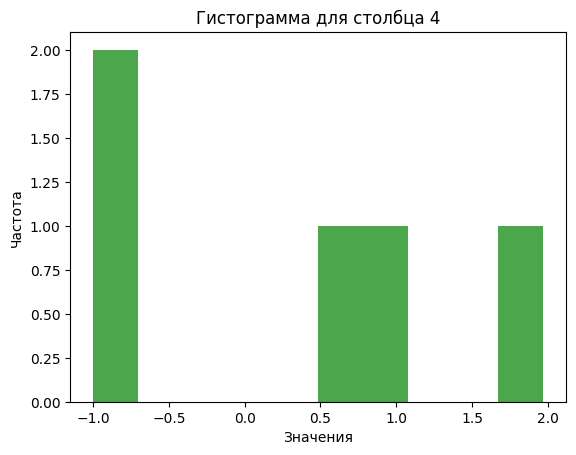

In [54]:

def generate_matrix_and_stats(m, n):
    """
    Генерация матрицы размером (m, n) случайных чисел, распределённых по нормальному закону.
    Вычисление мат. ожидания и дисперсии для каждой строки и каждого столбца.
    Строительство гистограмм для каждого столбца и строки.
    
    :param m: количество строк
    :param n: количество столбцов
    """
    # Генерация матрицы (m, n) случайных чисел с нормальным распределением
    matrix = np.random.randn(m, n)
    
    # Вычисление мат. ожидания и дисперсии для строк и столбцов
    mean_rows = np.mean(matrix, axis=1)  # среднее для строк
    var_rows = np.var(matrix, axis=1)    # дисперсия для строк
    
    mean_columns = np.mean(matrix, axis=0)  # среднее для столбцов
    var_columns = np.var(matrix, axis=0)    # дисперсия для столбцов
    
    print("Мат. ожидание для строк:", mean_rows)
    print("Дисперсия для строк:", var_rows)
    print("Мат. ожидание для столбцов:", mean_columns)
    print("Дисперсия для столбцов:", var_columns)
    
    # Построение гистограмм для строк
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, alpha=0.7, color='blue')
        plt.title(f"Гистограмма для строки {i+1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.show()
    
    # Построение гистограмм для столбцов
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green')
        plt.title(f"Гистограмма для столбца {j+1}")
        plt.xlabel("Значения")
        plt.ylabel("Частота")
        plt.show()

# Пример использования функции:
generate_matrix_and_stats(5, 4)  # матрица 5x4

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [55]:
def chess(m, n, a, b):
    """
    Заполняет матрицу размером (m, n) числами a и b в шахматном порядке.

    :param m: количество строк
    :param n: количество столбцов
    :param a: первое число для шахматного заполнения
    :param b: второе число для шахматного заполнения
    :return: матрица размером (m, n) с заполнением a и b в шахматном порядке
    """
    # Инициализация матрицы нулями
    matrix = np.zeros((m, n), dtype=int)
    
    # Заполнение матрицы числами a и b в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b

    return matrix


# Тесты
def test_chess():
    # Тест 1: проверка для матрицы 3x3 с числами 1 и 2
    expected_result = np.array([[1, 2, 1],
                                [2, 1, 2],
                                [1, 2, 1]])
    assert np.array_equal(chess(3, 3, 1, 2), expected_result), "Тест 1 не пройден!"

    # Тест 2: проверка для матрицы 2x2 с числами 5 и 10
    expected_result = np.array([[5, 10],
                                [10, 5]])
    assert np.array_equal(chess(2, 2, 5, 10), expected_result), "Тест 2 не пройден!"
    
    # Тест 3: проверка для матрицы 4x3 с числами 7 и 9
    expected_result = np.array([[7, 9, 7],
                                [9, 7, 9],
                                [7, 9, 7],
                                [9, 7, 9]])
    assert np.array_equal(chess(4, 3, 7, 9), expected_result), "Тест 3 не пройден!"

    # Тест 4: проверка для матрицы 1x1 с числами 3 и 4
    expected_result = np.array([[3]])
    assert np.array_equal(chess(1, 1, 3, 4), expected_result), "Тест 4 не пройден!"
    
    print("Все тесты пройдены!")

# Запуск тестов
test_chess()

Все тесты пройдены!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Рисуем прямоугольник 4x6 на изображении 10x10:


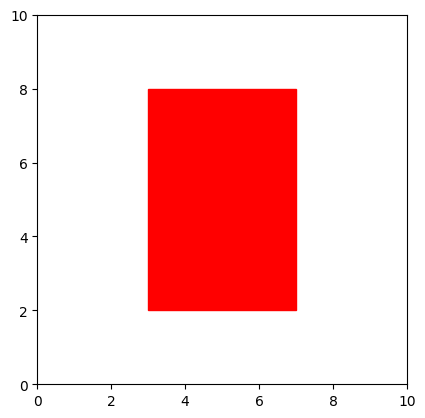

Рисуем овал с полуосями 3 и 5 на изображении 10x10:


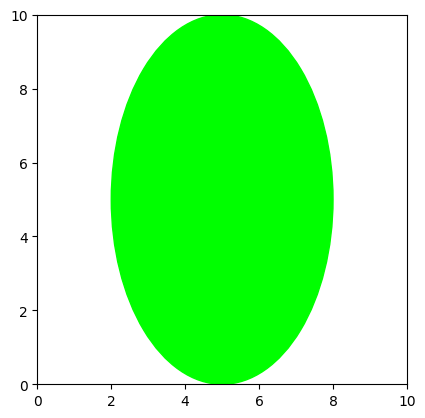

In [56]:
from matplotlib.patches import Rectangle, Ellipse
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    """
    Рисует прямоугольник размером (a, b) на изображении (m, n) с заданным цветом фона и прямоугольника.
    
    :param a: ширина прямоугольника
    :param b: высота прямоугольника
    :param m: высота изображения
    :param n: ширина изображения
    :param rectangle_color: цвет прямоугольника (формат RGB)
    :param background_color: цвет фона (формат RGB)
    """
    # Создаем пустое изображение с заданным фоновым цветом
    fig, ax = plt.subplots()
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_facecolor(background_color)
    
    # Создаем прямоугольник
    rect = Rectangle(((n - a) / 2, (m - b) / 2), a, b, color=rectangle_color)
    
    # Добавляем прямоугольник на изображение
    ax.add_patch(rect)
    
    # Отображаем изображение
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    """
    Рисует овал с полуосями a и b на изображении (m, n) с заданным цветом фона и овала.
    
    :param a: длина полуоси по оси x
    :param b: длина полуоси по оси y
    :param m: высота изображения
    :param n: ширина изображения
    :param ellipse_color: цвет овала (формат RGB)
    :param background_color: цвет фона (формат RGB)
    """
    # Создаем пустое изображение с заданным фоновым цветом
    fig, ax = plt.subplots()
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    ax.set_facecolor(background_color)
    
    # Создаем овал
    ellipse = Ellipse((n / 2, m / 2), 2 * a, 2 * b, color=ellipse_color)
    
    # Добавляем овал на изображение
    ax.add_patch(ellipse)
    
    # Отображаем изображение
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


# Тесты
def test_draw_shapes():
    # Тест 1: Прямоугольник размером 4x6 на изображении 10x10
    print("Рисуем прямоугольник 4x6 на изображении 10x10:")
    draw_rectangle(4, 6, 10, 10, rectangle_color=(1, 0, 0), background_color=(1, 1, 1))  # красный прямоугольник на белом фоне
    
    # Тест 2: Овал с полуосями 3 и 5 на изображении 10x10
    print("Рисуем овал с полуосями 3 и 5 на изображении 10x10:")
    draw_ellipse(3, 5, 10, 10, ellipse_color=(0, 1, 0), background_color=(1, 1, 1))  # зеленый овал на белом фоне

# Запуск тестов
test_draw_shapes()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [57]:
from scipy.signal import find_peaks

def time_series_analysis(series, p):
    """
    Выполняет анализ временного ряда:
    1. Находит мат. ожидание, дисперсию и СКО.
    2. Находит все локальные максимумы и минимумы.
    3. Вычисляет скользящее среднее с размером окна p.

    :param series: временной ряд (numpy array или список)
    :param p: размер окна для скользящего среднего
    :return: результаты анализа в виде словаря
    """
    # Преобразуем временной ряд в numpy массив, если это список
    series = np.array(series)
    
    # 1. Вычисление математического ожидания, дисперсии и СКО
    mean_value = np.mean(series)
    variance_value = np.var(series)
    std_dev = np.std(series)
    
    # 2. Поиск локальных максимумов и минимумов
    # Для локальных максимумов используем find_peaks
    local_maxima_indices, _ = find_peaks(series)
    local_minima_indices, _ = find_peaks(-series)  # инвертируем ряд для поиска минимумов
    
    local_maxima = series[local_maxima_indices]
    local_minima = series[local_minima_indices]
    
    # 3. Вычисление скользящего среднего
    def moving_average(series, p):
        return np.convolve(series, np.ones(p), 'valid') / p
    
    moving_avg_series = moving_average(series, p)
    
    # Возвращаем результаты анализа в виде словаря
    results = {
        "mean": mean_value,
        "variance": variance_value,
        "std_dev": std_dev,
        "local_maxima_indices": local_maxima_indices,
        "local_maxima": local_maxima,
        "local_minima_indices": local_minima_indices,
        "local_minima": local_minima,
        "moving_average": moving_avg_series
    }
    
    return results


# Тесты
def test_time_series_analysis():
    series = [1, 3, 7, 1, 2, 6, 0, 1, 4, 1, 3, 8, 7, 2, 5, 6, 1]
    p = 3  # размер окна для скользящего среднего
    
    results = time_series_analysis(series, p)
    
    # Вывод результатов анализа
    print(f"Математическое ожидание: {results['mean']}")
    print(f"Дисперсия: {results['variance']}")
    print(f"Стандартное отклонение: {results['std_dev']}")
    
    print(f"Локальные максимумы: {results['local_maxima']} на индексах {results['local_maxima_indices']}")
    print(f"Локальные минимумы: {results['local_minima']} на индексах {results['local_minima_indices']}")
    
    print(f"Скользящее среднее (p={p}): {results['moving_average']}")


# Запуск тестов
test_time_series_analysis()

Математическое ожидание: 3.411764705882353
Дисперсия: 6.359861591695502
Стандартное отклонение: 2.521876601203061
Локальные максимумы: [7 6 4 8 6] на индексах [ 2  5  8 11 15]
Локальные минимумы: [1 0 1 2] на индексах [ 3  6  9 13]
Скользящее среднее (p=3): [3.66666667 3.66666667 3.33333333 3.         2.66666667 2.33333333
 1.66666667 2.         2.66666667 4.         6.         5.66666667
 4.66666667 4.33333333 4.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [58]:
def one_hot_encoding(class_labels):
    """
    Выполняет one-hot-encoding для вектора с целочисленными метками классов.
    
    :param class_labels: вектор с метками классов (список или numpy array)
    :return: двумерный массив, представляющий one-hot-кодирование
    """
    # Находим количество уникальных классов
    num_classes = np.max(class_labels) + 1
    
    # Создаем матрицу нулей с размерами (количество элементов в векторе, количество классов)
    one_hot_matrix = np.zeros((len(class_labels), num_classes))
    
    # Заполняем 1 в позициях, соответствующих меткам классов
    one_hot_matrix[np.arange(len(class_labels)), class_labels] = 1
    
    return one_hot_matrix


# Тесты
def test_one_hot_encoding():
    # Тест 1: Пример с вектором [0, 2, 3, 0]
    class_labels = [0, 2, 3, 0]
    expected_result = np.array([[1, 0, 0, 0],
                                [0, 0, 1, 0],
                                [0, 0, 0, 1],
                                [1, 0, 0, 0]])
    
    result = one_hot_encoding(class_labels)
    
    assert np.array_equal(result, expected_result), "Тест 1 не пройден!"
    
    # Тест 2: Пример с вектором [1, 1, 0, 2]
    class_labels = [1, 1, 0, 2]
    expected_result = np.array([[0, 1, 0],
                                [0, 1, 0],
                                [1, 0, 0],
                                [0, 0, 1]])
    
    result = one_hot_encoding(class_labels)
    
    assert np.array_equal(result, expected_result), "Тест 2 не пройден!"
    
    print("Все тесты пройдены!")

# Запуск тестов
test_one_hot_encoding()

Все тесты пройдены!
